# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [22]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.rename(columns={"Annual Income (k$)" : "income$", "Spending Score (1-100)" : "SpendingScore" }, inplace= True)

In [26]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income$,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [28]:
df["income$"] = df["income$"] * 1000

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
income$,200.0,60560.00,26264.721165,15000.0,41500.00,61500.0,78000.00,137000.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [30]:
df.drop(columns="CustomerID", inplace=True)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [31]:
df.drop(columns="Gender").corr()


,Age,income$,SpendingScore
Age,1.000000,-0.012398,-0.327227
income$,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


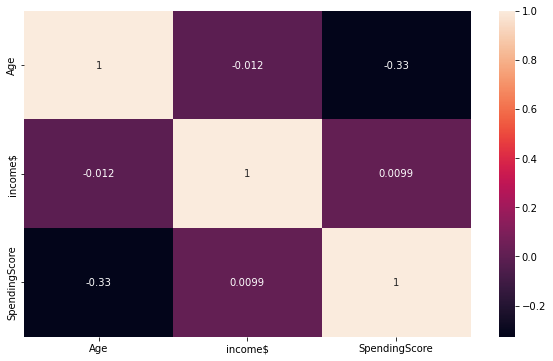

In [32]:
sns.heatmap(df.drop(columns="Gender").corr(), annot=True);

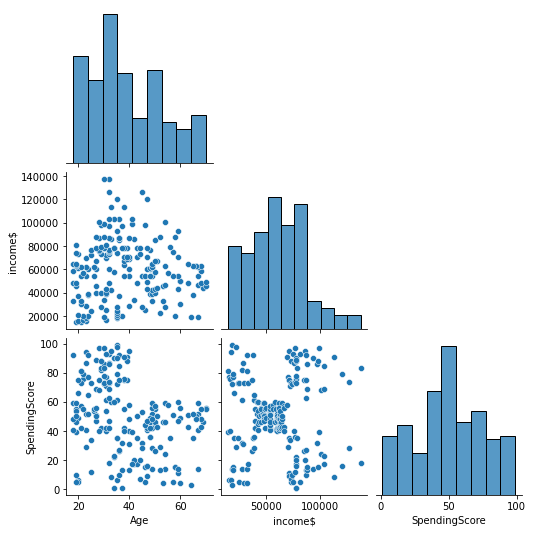

In [33]:
sns.pairplot(data=df, corner=True);

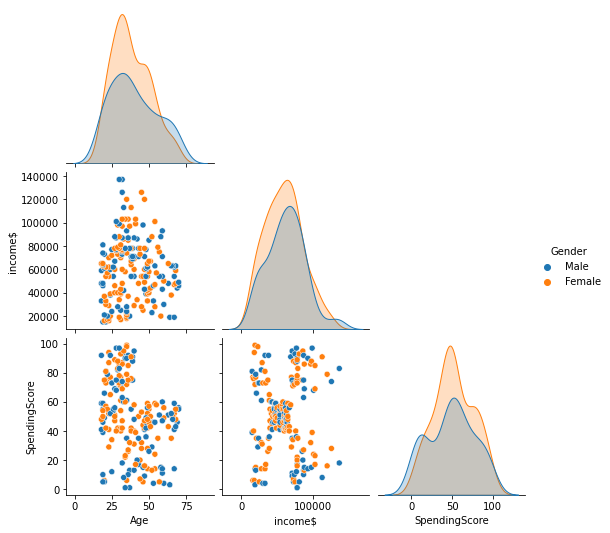

In [34]:
sns.pairplot(data=df, corner=True, hue="Gender");

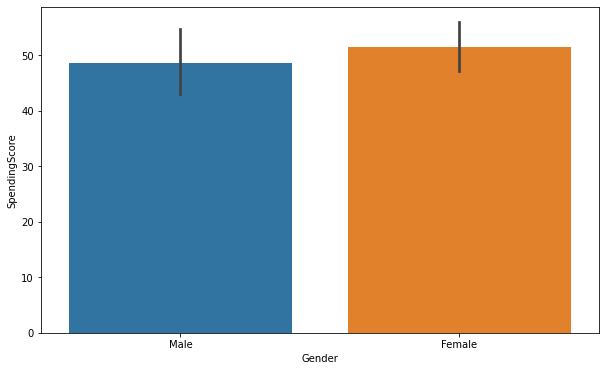

In [35]:
sns.barplot(data=df, y="SpendingScore", x = "Gender");

---
---

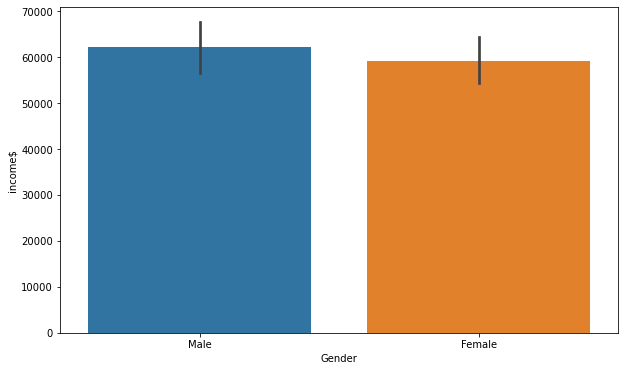

In [36]:
sns.barplot(data=df, y="income$", x = "Gender");

## Scaling

In [37]:
df.drop(columns="Gender", inplace=True)

In [38]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [39]:
# !pip install pyclustertend

In [40]:
from pyclustertend import hopkins

In [41]:
hopkins(df_scaled, df.shape[0])

0.3055582289225969

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [42]:
X = df_scaled
K_means_model = KMeans(n_clusters=4, random_state=42)

In [43]:
K_means_model.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 0, 2, 2, 2, 3, 3, 3, 3, 2, 0, 1, 1, 0, 1, 0, 1, 3, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [44]:
df["Clusters"] = K_means_model.labels_
df

,Age,income$,SpendingScore,Clusters
0,19,15000,39,2
1,21,15000,81,2
2,20,16000,6,2
3,23,16000,77,2
4,31,17000,40,2
...,...,...,...,...
195,35,120000,79,1
196,45,126000,28,0
197,32,126000,74,1
198,32,137000,18,0


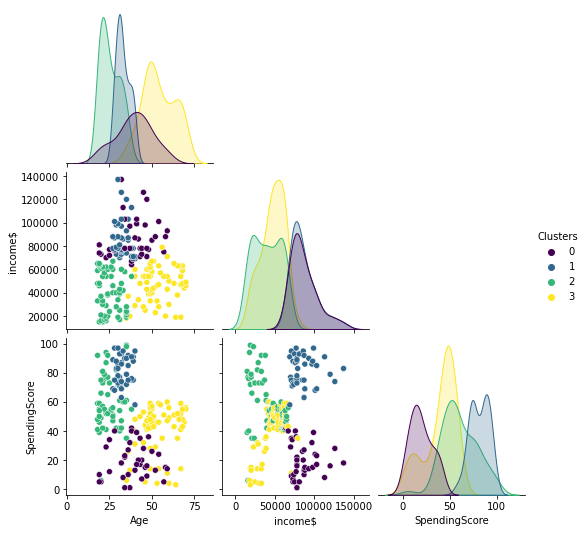

In [45]:
sns.pairplot(data=df, hue="Clusters", corner=True, palette="viridis" )

In [48]:
df.groupby("Clusters").describe().T

Clusters                         0              1             2             3
Age           count      38.000000      40.000000     57.000000     65.000000
              mean       39.368421      32.875000     25.438596     53.984615
              std        10.617225       3.857643      5.707193      9.418221
              min        19.000000      27.000000     18.000000     35.000000
              25%        34.000000      30.000000     21.000000     48.000000
              50%        40.500000      32.000000     24.000000     52.000000
              75%        46.750000      36.000000     31.000000     63.000000
              max        59.000000      40.000000     38.000000     70.000000
income$       count      38.000000      40.000000     57.000000     65.000000
              mean    86500.000000   86100.000000  40000.000000  47707.692308
              std     16761.845348   16339.036158  17031.483452  14648.723363
              min     64000.000000   69000.000000  15000.000000  18000.000000
              25%     75250.000000   74750.000000  24000.000000  39000.000000
              50%     79500.000000   78500.000000  40000.000000  49000.000000
              75%     96000.000000   94000.000000  57000.000000  60000.000000
              max    137000.000000  137000.000000  67000.000000  79000.000000
SpendingScore count      38.000000      40.000000     57.000000     65.000000
              mean       19.578947      81.525000     60.298246     39.969231
              std        11.684204       9.999968     18.434212     16.405953
              min         1.000000      58.000000      6.000000      3.000000
              25%        10.500000      74.000000     48.000000     32.000000
              50%        17.000000      83.000000     56.000000     46.000000
              75%        27.750000      90.000000     73.000000     51.000000
              max        42.000000      97.000000     99.000000     60.000000

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [49]:
df1 = df[["Age", "SpendingScore"]]

#### *ii. Determine optimal number of clusters*

In [50]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
X = df_scaled

In [51]:
ssd = []  # sum squared distance

K = range(2,10)  # Aralık verdik deniyoruz

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster
    
# Her k için inertiaları hesaplayacak ssd listesine atacak

Text(0.5, 1.0, 'elbow method')

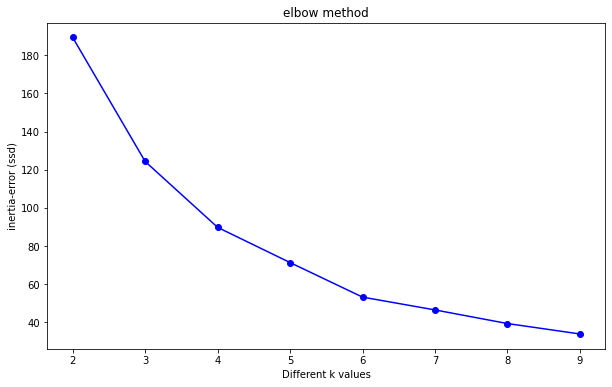

In [52]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method")

# Genelde bu elbow oluşuyor. 3 mü seçmeliyiz 4 mü ? Inceleme yaparak karar vereceğiz

In [53]:
silhouette_score(X, K_means_model.labels_)

0.2465656586390167

In [54]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
    
# 1'e ne kadar yakınsa o kadar kümelemeye elverişli
# Küme içi ve kümeler arası uzaklık


For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621


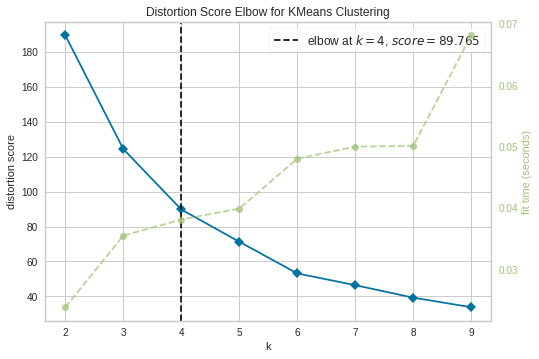

In [55]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### *iii. Apply K Means*

In [56]:
K_means_model.fit_predict(X)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [57]:
df1["Clusters"] = K_means_model.labels_
df1

,Age,SpendingScore,Clusters
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0
...,...,...,...
195,35,79,2
196,45,28,3
197,32,74,2
198,32,18,0


#### *iv. Visualizing and Labeling All the Clusters*

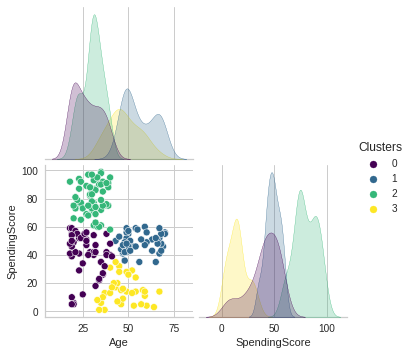

In [58]:
sns.pairplot(data=df1, hue="Clusters", corner=True, palette="viridis");

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [59]:
df2 = df[["income$", "SpendingScore"]]

#### *ii. Apply K Means*

In [60]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
X = df_scaled

In [61]:
K_means_model.fit_predict(X)
df2["Clusters"] = K_means_model.labels_
df2

,income$,SpendingScore,Clusters
0,15000,39,0
1,15000,81,3
2,16000,6,0
3,16000,77,3
4,17000,40,0
...,...,...,...
195,120000,79,1
196,126000,28,2
197,126000,74,1
198,137000,18,2


#### *iv. Visualizing and Labeling All the Clusters*

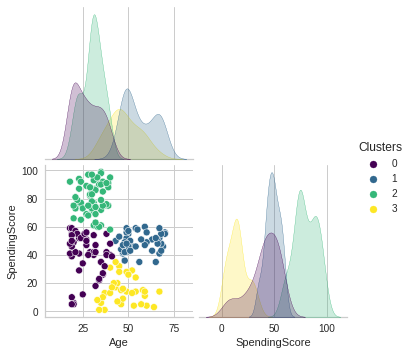

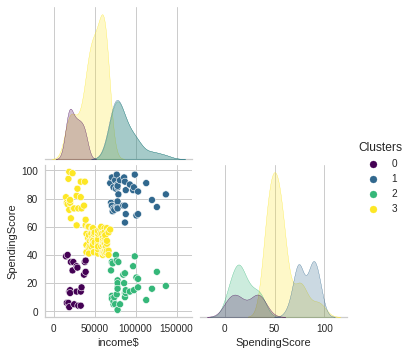

In [62]:
sns.pairplot(data=df1, hue="Clusters", corner=True, palette="viridis")
sns.pairplot(data=df2, hue="Clusters", corner=True, palette="viridis");

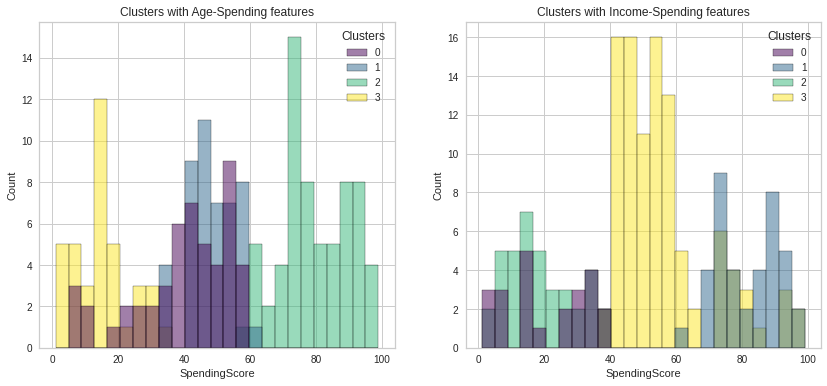

In [63]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.histplot(data=df1, x="SpendingScore", hue="Clusters", bins=25, palette="viridis").set_title("Clusters with Age-Spending features")
plt.subplot(122)
sns.histplot(data=df2, x="SpendingScore", hue="Clusters", bins=25, palette="viridis").set_title("Clusters with Income-Spending features");

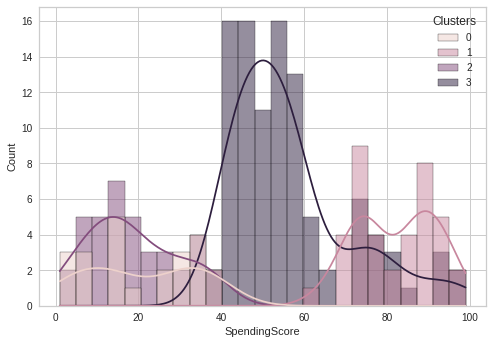

In [64]:
sns.histplot(data=df2, x="SpendingScore", hue="Clusters", bins=25, kde=True);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [65]:
df

,Age,income$,SpendingScore,Clusters
0,19,15000,39,2
1,21,15000,81,2
2,20,16000,6,2
3,23,16000,77,2
4,31,17000,40,2
...,...,...,...,...
195,35,120000,79,1
196,45,126000,28,0
197,32,126000,74,1
198,32,137000,18,0


In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [67]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled

In [68]:
# Bu 4 linkage metodu üzerinden dendogram çizdireceğiz
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete") 
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

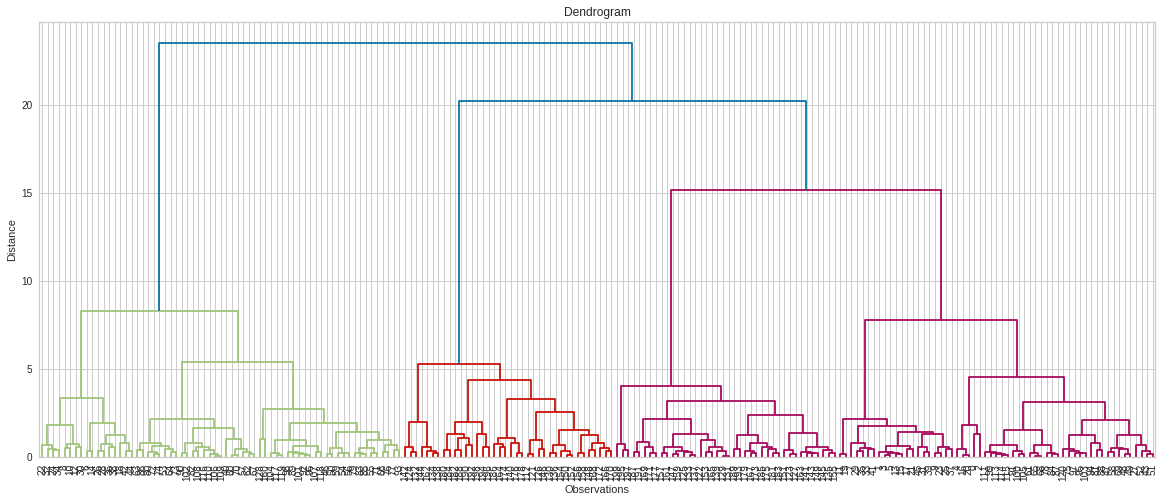

In [69]:
# Ward için dendogram
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);
# Altta karşılaştırmalı bakalım

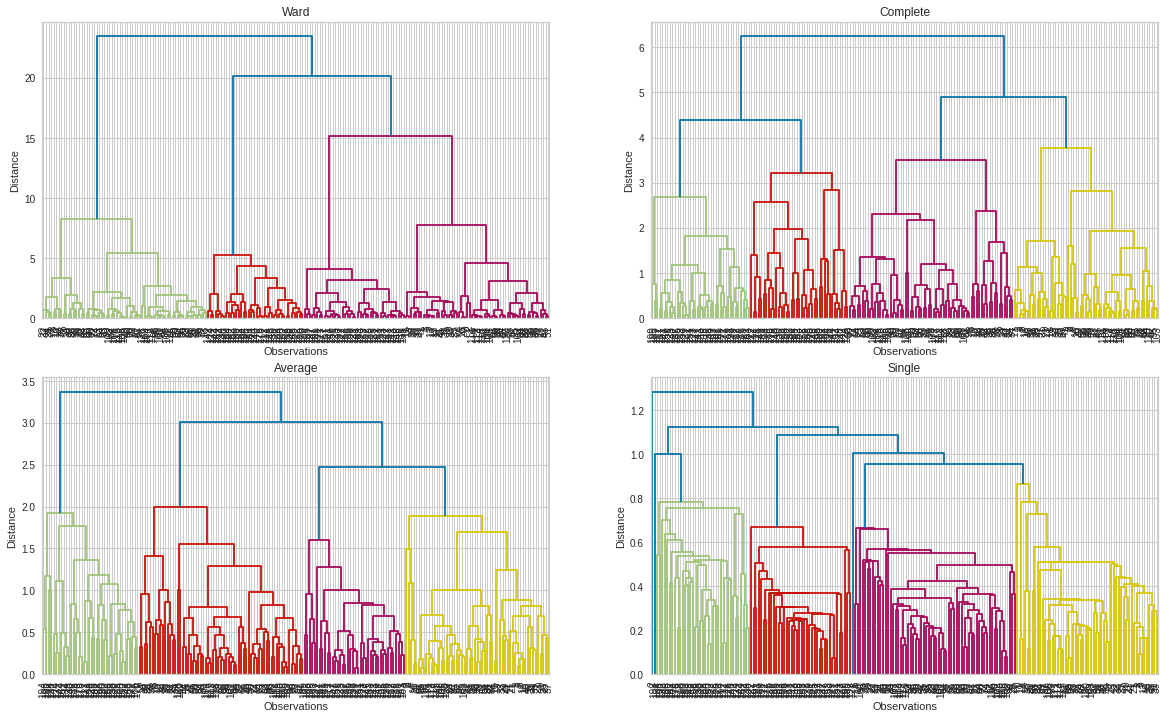

In [70]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# Hangisi daha iyi insight sağlıyor?(Alttaki ekran görüntülerine bakılabilir)
# Ward: Mavi çizgi bize 2 cluster a ayırabilirsin diyor. Kümelerin birbirlerine olan uzaklıklarına bakalım.
# .. aradaki mesafe 20 birim
# Complete: Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 3 birim
# Average : Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 2 birim
# Single  : Mavi çizgi bize 2 cluster a ayırabilirsin diyor aynı şekilde
# .. aradaki mesafe 0.8 birim

# Mesafelerin en uzak olduğu "ward"(20 birim). Ward kullanacağız. Genelde de ward kullanılır

# Burada alttaki data noktaları karışık görünüyor "truncate_mode" u "p" ile beraber kullanırsak daha güzel bir çıktı gelir

## Clustering based on Annual Income and Spending Score- x2

In [71]:
df.drop(columns="Age", inplace=True)

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [72]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled

#### Annual Income and Spending Score- x2

In [73]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete") 
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

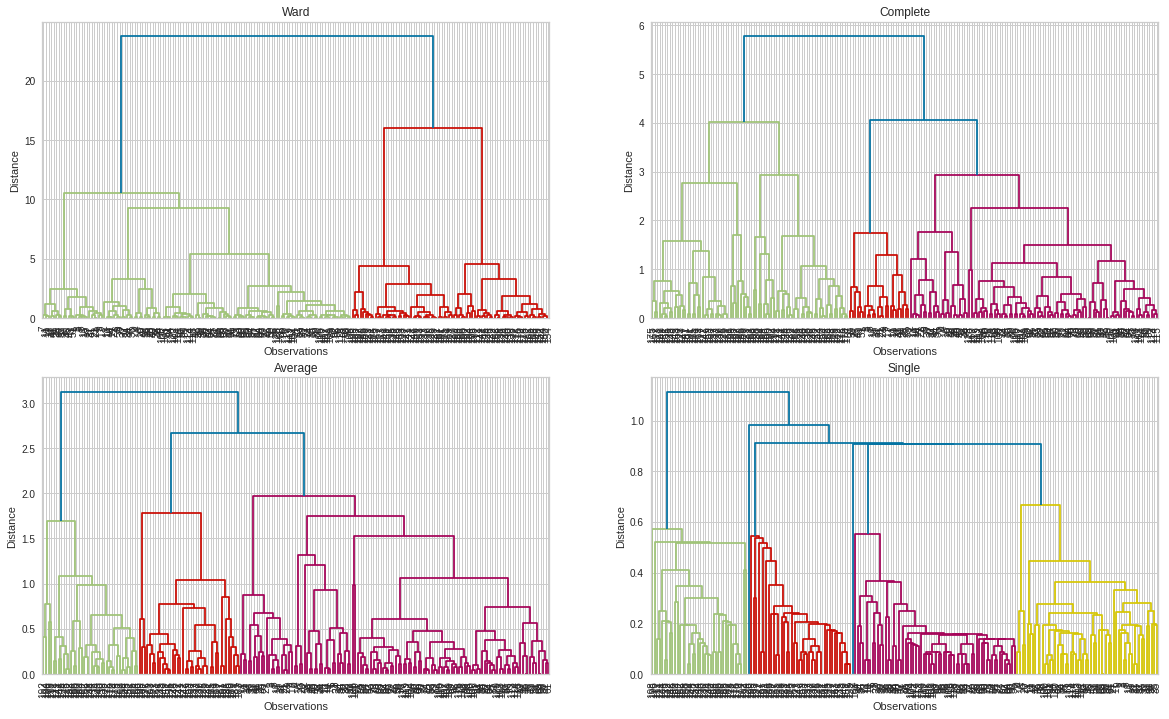

In [74]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [75]:
df = df[["income$", "SpendingScore"]]

In [76]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X = df_scaled

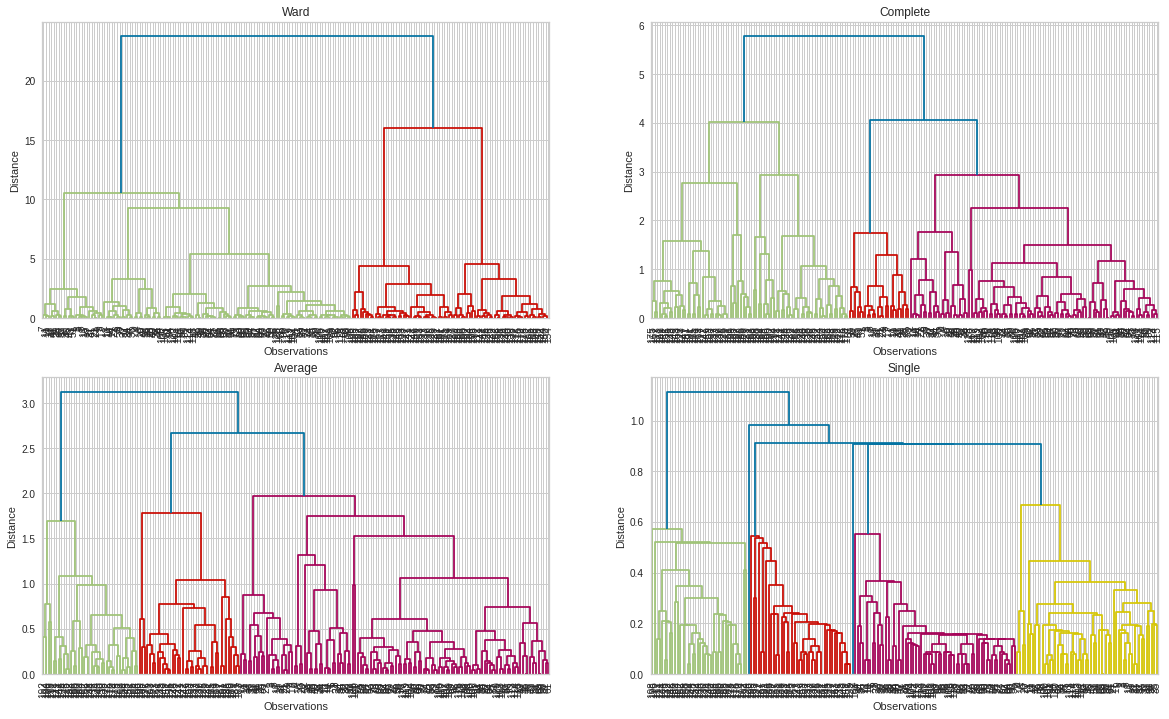

In [77]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [78]:
from sklearn.metrics import silhouette_score

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [81]:
model1 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward") # default değerler
model1.fit_predict(X)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [82]:
model1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

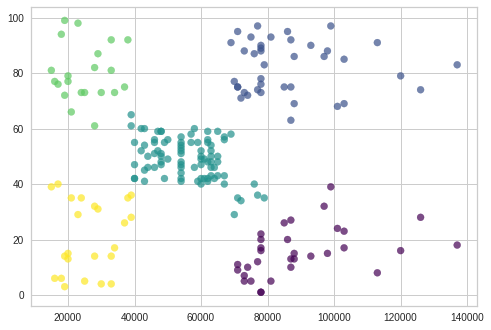

In [85]:
plt.scatter(df["income$"], df["SpendingScore"], c = model1.labels_, cmap = "viridis", alpha =0.7)


In [86]:
list(model1.labels_)

[4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]

In [87]:
df = df[["income$", "SpendingScore"]]

In [88]:
df["Clusters"] =list(model1.labels_)
df


,income$,SpendingScore,Clusters
0,15000,39,4
1,15000,81,3
2,16000,6,4
3,16000,77,3
4,17000,40,4
...,...,...,...
195,120000,79,1
196,126000,28,0
197,126000,74,1
198,137000,18,0


<AxesSubplot:xlabel='Clusters', ylabel='income$'>

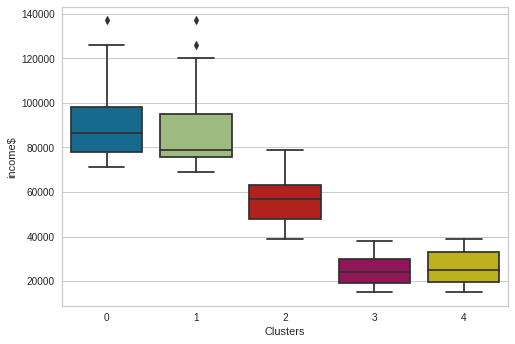

In [89]:
# plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y="income$", x="Clusters")


<AxesSubplot:xlabel='Clusters', ylabel='SpendingScore'>

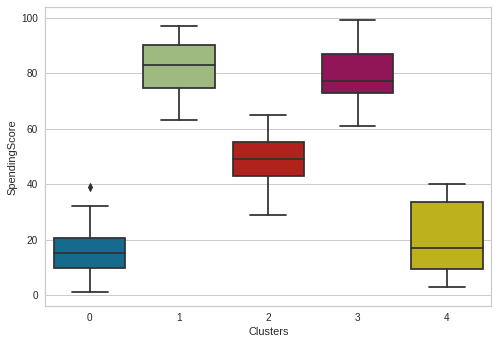

In [90]:
# plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y="SpendingScore", x="Clusters")


In [91]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.